## Importing The Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

from scipy import stats

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

## Importing the Dataset

In [3]:
df = pd.read_csv('car_web_scraped_dataset.csv')
df.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"


In [4]:
df.shape

(2840, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       2840 non-null   object
 1   year       2840 non-null   int64 
 2   miles      2840 non-null   object
 3   color      2840 non-null   object
 4   condition  2840 non-null   object
 5   price      2840 non-null   object
dtypes: int64(1), object(5)
memory usage: 133.2+ KB


## Checking Dulicates

In [6]:
df.duplicated().sum()

528

In [7]:
df = df.drop_duplicates()

## Data Cleaning

In [8]:
df.isnull().sum()/len(df)*100

name        0.000000
year        0.000000
miles       0.000000
color       0.000000
condition   0.000000
price       0.000000
dtype: float64

In [9]:
df['miles'] = df['miles'].str.strip('miles').str.replace(',', '')

In [10]:
df['miles'] = df['miles'].astype('int64')

In [11]:
df['price'] = df['price'].str.strip('$').str.replace(',', '')
df['price']

0        15988
1        38008
2        24988
3        18998
4        19498
5        21000
6        20998
7        18887
8        19498
9        17998
10       30998
11       20998
12       22597
13       29998
14       39998
15       21998
16       17998
17       17998
18       19598
19       18285
20      102167
21       26998
22       26839
23       27998
24       26518
25       19988
26       16488
27       29990
28       23998
29       20998
30       24498
31       16498
32       19998
33       20998
34       16998
35       43998
36       27798
37       20998
38       20998
39       23998
40       19998
41       17998
42       14998
43       20994
44       35037
46       15998
47       20998
48       23998
49       20222
50       20698
51       27998
52       15998
53       14998
54       21499
55       40998
56       14300
57       60800
58       24988
59       16998
60       21788
61       24498
62       16998
63       28998
64       26998
65       28998
66       33998
67       2

In [12]:
df['price'] = df['price'].astype('int64')

In [13]:
df[['Accident', 'Owners']] = df['condition'].str.split(',', n= 1, expand= True)
df.sample()

,name,year,miles,color,condition,price,Accident,Owners
1622,Volvo XC40,2021,19237,"Gray exterior, Black interior","No accidents reported, 1 Owner",34423,No accidents reported,1 Owner


In [14]:
df['Owners'] = df['Owners'].str.replace('Owner', '')
df.head(10)

,name,year,miles,color,condition,price,Accident,Owners
0,Kia Forte,2022,41406,"Gray exterior, Black interior","No accidents reported, 1 Owner",15988,No accidents reported,1
1,Chevrolet Silverado 1500,2021,15138,"White exterior, Black interior","1 accident reported, 1 Owner",38008,1 accident reported,1
2,Toyota RAV4,2022,32879,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988,No accidents reported,1
3,Honda Civic,2020,37190,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998,No accidents reported,1
4,Honda Civic,2020,27496,"Black exterior, Black interior","No accidents reported, 1 Owner",19498,No accidents reported,1
5,Honda Civic,2020,29026,"Silver exterior, Black interior","1 accident reported, 1 Owner",21000,1 accident reported,1
6,Honda Accord,2019,4148,"Black exterior, Black interior","1 accident reported, 1 Owner",20998,1 accident reported,1
7,Mercedes-Benz GLC,2018,57602,"Blue exterior, Unknown interior","1 accident reported, 3 Owners",18887,1 accident reported,3 s
8,Honda Civic,2020,50240,"Black exterior, Black interior","1 accident reported, 1 Owner",19498,1 accident reported,1
9,BMW 5 Series,2013,56766,"White exterior, Black interior","No accidents reported, 3 Owners",17998,No accidents reported,3 s


In [15]:
df['Owners'] = df['Owners'].str.replace('Owner', '')
df['Owners'] = df['Owners'].str.replace('s', '').astype('int64')
df.head(10)

,name,year,miles,color,condition,price,Accident,Owners
0,Kia Forte,2022,41406,"Gray exterior, Black interior","No accidents reported, 1 Owner",15988,No accidents reported,1
1,Chevrolet Silverado 1500,2021,15138,"White exterior, Black interior","1 accident reported, 1 Owner",38008,1 accident reported,1
2,Toyota RAV4,2022,32879,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988,No accidents reported,1
3,Honda Civic,2020,37190,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998,No accidents reported,1
4,Honda Civic,2020,27496,"Black exterior, Black interior","No accidents reported, 1 Owner",19498,No accidents reported,1
5,Honda Civic,2020,29026,"Silver exterior, Black interior","1 accident reported, 1 Owner",21000,1 accident reported,1
6,Honda Accord,2019,4148,"Black exterior, Black interior","1 accident reported, 1 Owner",20998,1 accident reported,1
7,Mercedes-Benz GLC,2018,57602,"Blue exterior, Unknown interior","1 accident reported, 3 Owners",18887,1 accident reported,3
8,Honda Civic,2020,50240,"Black exterior, Black interior","1 accident reported, 1 Owner",19498,1 accident reported,1
9,BMW 5 Series,2013,56766,"White exterior, Black interior","No accidents reported, 3 Owners",17998,No accidents reported,3


In [16]:
df = df.drop('condition', axis= 1)

In [17]:
df[['exterior', 'interior']] = df['color'].str.split(',', n= 1, expand= True)
df.sample()

,name,year,miles,color,price,Accident,Owners,exterior,interior
269,Maserati GranTurismo,2014,52973,"Black exterior, Beige interior",39999,No accidents reported,2,Black exterior,Beige interior


In [18]:
df['exterior'] = df['exterior'].str.strip('exterior').str.replace(' ', '')
df['interior'] = df['interior'].str.strip('interior').str.replace(' ', '')

In [19]:
df = df.drop('color', axis= 1)

In [20]:
df[['brand', 'model']] = df['name'].str.split(' ', n= 1, expand= True)
df.sample()

,name,year,miles,price,Accident,Owners,exterior,interior,brand,model
1849,Toyota Corolla,2021,39688,19078,No accidents reported,1,Blue,Gray,Toyota,Corolla


In [21]:
df = df.drop('name', axis= 1)

In [22]:
df['Accident'] = df['Accident'].astype('str')
df['Accident'] = df['Accident'].str.extract(r'(\d+) accident')
df['Accident'] = df['Accident'].fillna(0).astype('int64')

In [23]:
df['interior'] = df['interior'].replace('Unknown','nan')

In [24]:
df.isnull().sum()/len(df)*100

year       0.000000
miles      0.000000
price      0.000000
Accident   0.000000
Owners     0.000000
exterior   0.000000
interior   0.000000
brand      0.000000
model      0.000000
dtype: float64

In [25]:
df['exterior'] = df['exterior'].replace(np.nan, 'White')
df['interior'] = df['interior'].replace(np.nan, 'Black')

In [26]:
df.isnull().sum()/len(df)*100

year       0.000000
miles      0.000000
price      0.000000
Accident   0.000000
Owners     0.000000
exterior   0.000000
interior   0.000000
brand      0.000000
model      0.000000
dtype: float64

## Checking Multicollinearity

<AxesSubplot:>

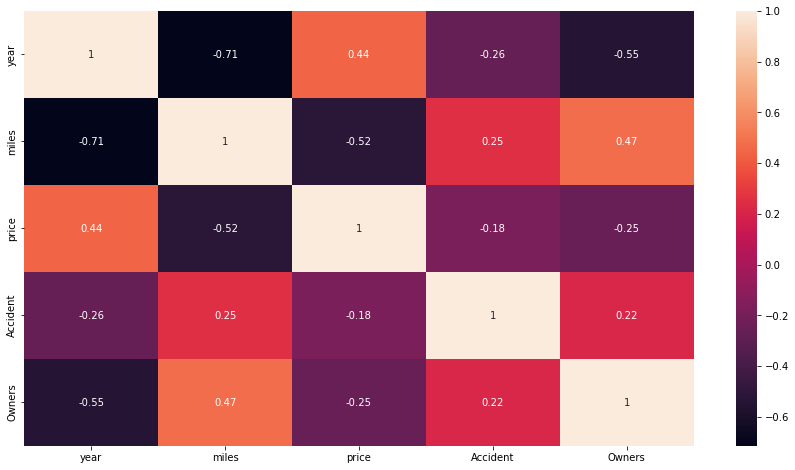

In [27]:
sns.heatmap(df.corr(), annot= True)

In [28]:
df = df.drop('year', axis= 1)

<AxesSubplot:>

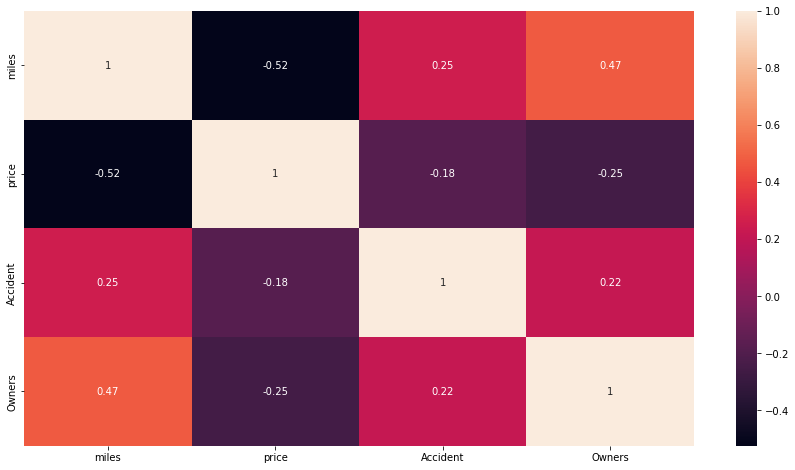

In [29]:
sns.heatmap(df.corr(), annot= True)

## Exploratory Data Analysis

### Univariate Analysis

<AxesSubplot:xlabel='brand', ylabel='count'>

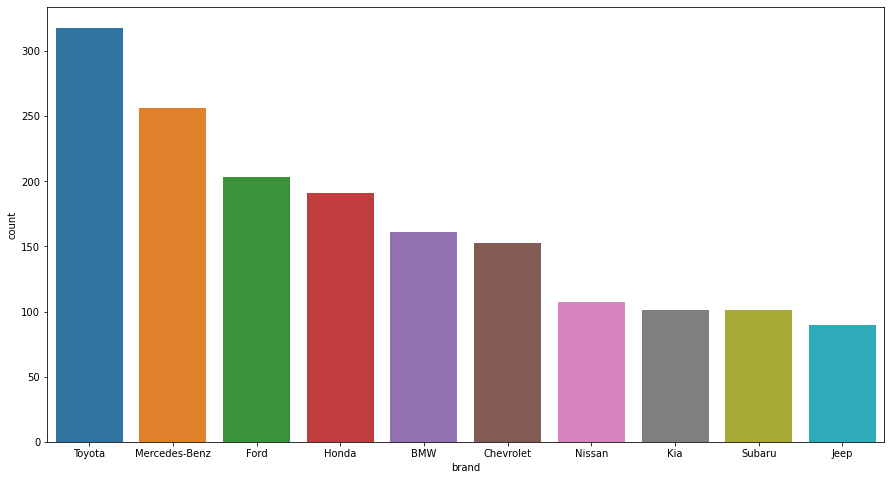

In [30]:
top_brands = df['brand'].value_counts().nlargest(10).index

df_top_brands = df[df['brand'].isin(top_brands)]

sns.countplot(data= df_top_brands, x= 'brand', order= top_brands)

In [ ]:
# From the above plot we can see that the Toyota brand is most ordered

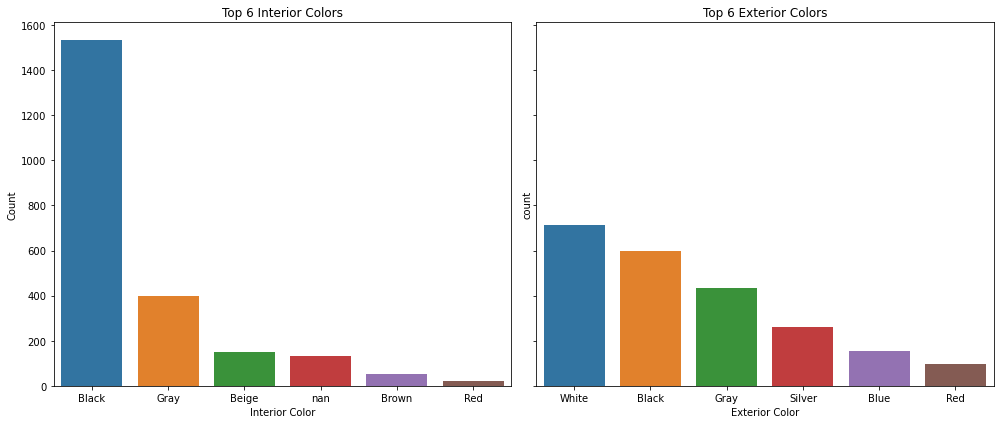

In [31]:
top_interior_colors = df['interior'].value_counts().nlargest(6).index
top_exterior_colors = df['exterior'].value_counts().nlargest(6).index

df_top_interior = df[df['interior'].isin(top_interior_colors)]
df_top_exterior = df[df['exterior'].isin(top_exterior_colors)]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.countplot(data=df_top_interior, x='interior', order=top_interior_colors, ax=axes[0])
axes[0].set_title('Top 6 Interior Colors')
axes[0].set_xlabel('Interior Color')
axes[0].set_ylabel('Count')

sns.countplot(data=df_top_exterior, x='exterior', order=top_exterior_colors, ax=axes[1])
axes[1].set_title('Top 6 Exterior Colors')
axes[1].set_xlabel('Exterior Color')

plt.tight_layout()
plt.show()

In [69]:
# From the above plot we can see that people prefer having car with black interior color and white external color

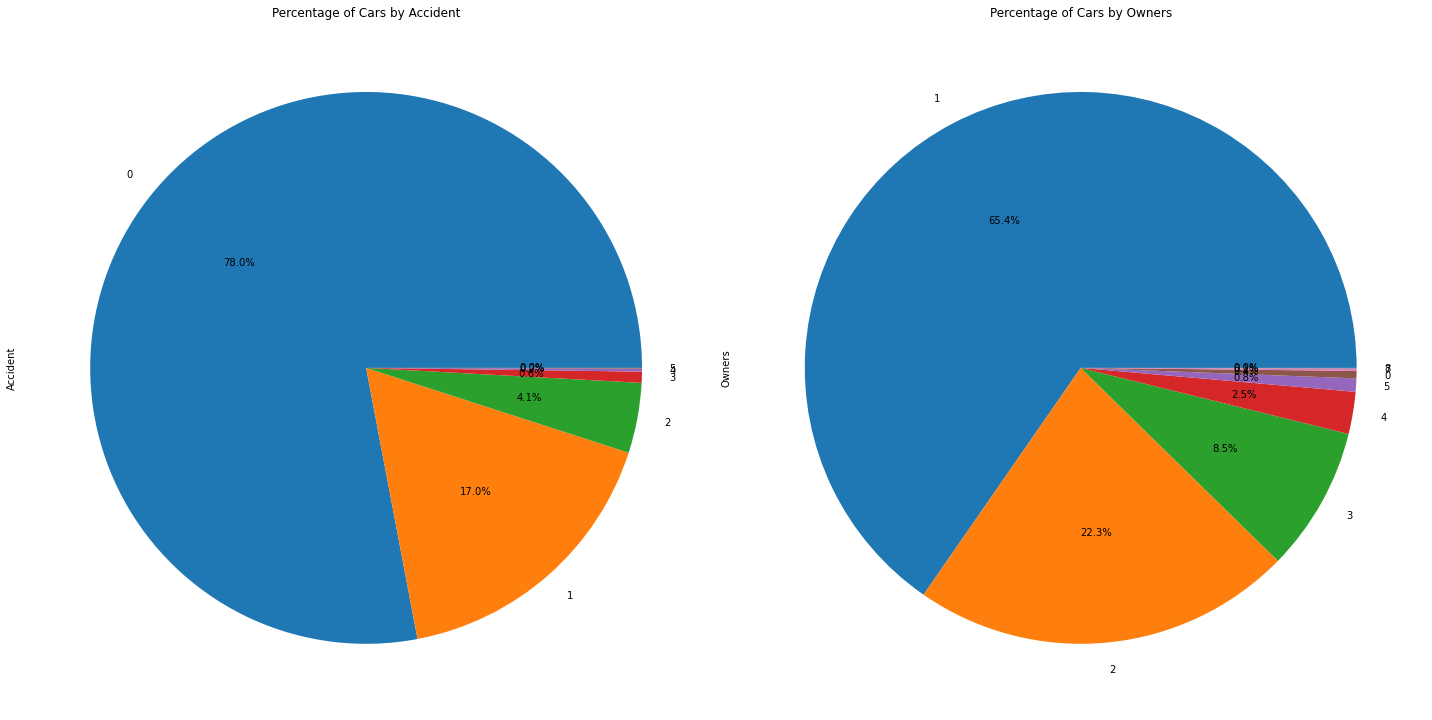

In [32]:
e = ['Accident', 'Owners']
plt.figure(figsize= (20,15))
for i, col in enumerate(e):
    plt.subplot(1,2,i+1)
    df[col].value_counts().plot.pie(autopct= '%.1f%%')
    plt.title(f'Percentage of Cars by {col}')
              
plt.tight_layout()
plt.show()

In [ ]:
# From the above plot we can see that the most used cars have 0 accidents with 78% and have only 1 past owners with 65.4%

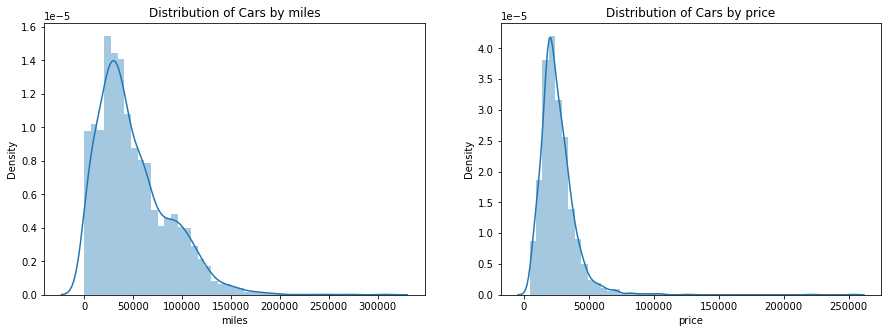

In [33]:
e = ['miles', 'price']
plt.figure(figsize= (15,5))

for i, col in enumerate(e):
    plt.subplot(1,2, i+1)
    sns.distplot(df[col])
    plt.title(f'Distribution of Cars by {col}')

In [ ]:
# From the above plot we can see that the used cars having miles range betwwen 0-50000 is most preffered

### Bivariate Analysis

Text(0.5, 0, 'Mean Price')

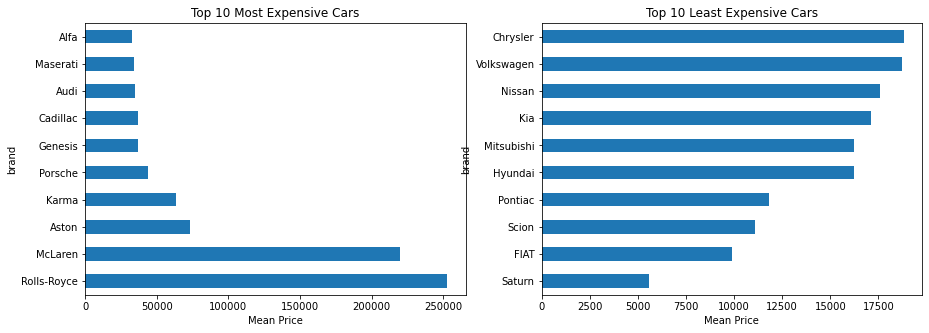

In [34]:
a = df.groupby('brand')['price'].mean().sort_values(ascending= False).head(10)
b = df.groupby('brand')['price'].mean().sort_values(ascending= True).head(10)

fig, (f,g) = plt.subplots(1,2, figsize= (15,5))

a.plot(kind= 'barh', ax= f)
b.plot(kind= 'barh', ax= g)
f.set_title('Top 10 Most Expensive Cars')
g.set_title('Top 10 Least Expensive Cars')
f.set_xlabel('Mean Price')
g.set_xlabel('Mean Price')

In [ ]:
# From the above plot we can see that after calculating the meam price the most expensive cars is Rolls-Royce and the least
# expensive car is chrysler

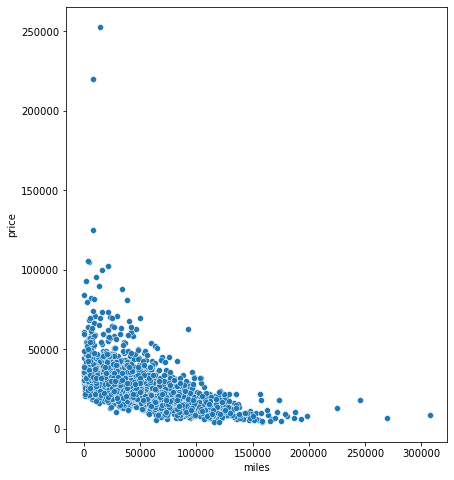

In [35]:
h = ['miles']

for i, col in enumerate(h):
    plt.subplot(1,2, i+1)
    sns.scatterplot(x= df[col], y= df['price'])

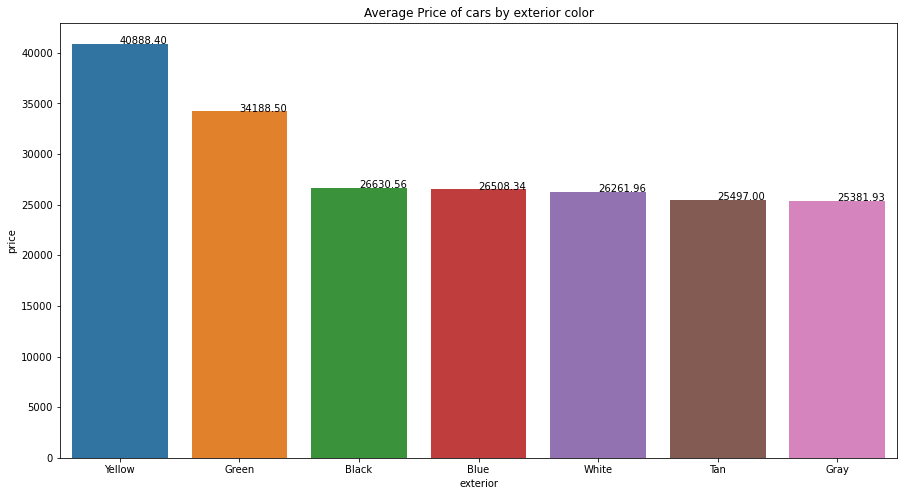

In [36]:
i = df.groupby('exterior')['price'].mean().sort_values(ascending= False).head(7).reset_index()

sns.barplot(data= i, x= i['exterior'], y= i['price'])
plt.title('Average Price of cars by exterior color')

for i,data in enumerate(i['price']):
    plt.text(i,data, s= f'{data:.2f}')

In [ ]:
# From the above plot we can conclude that the car having exterior color yellow has the most average price

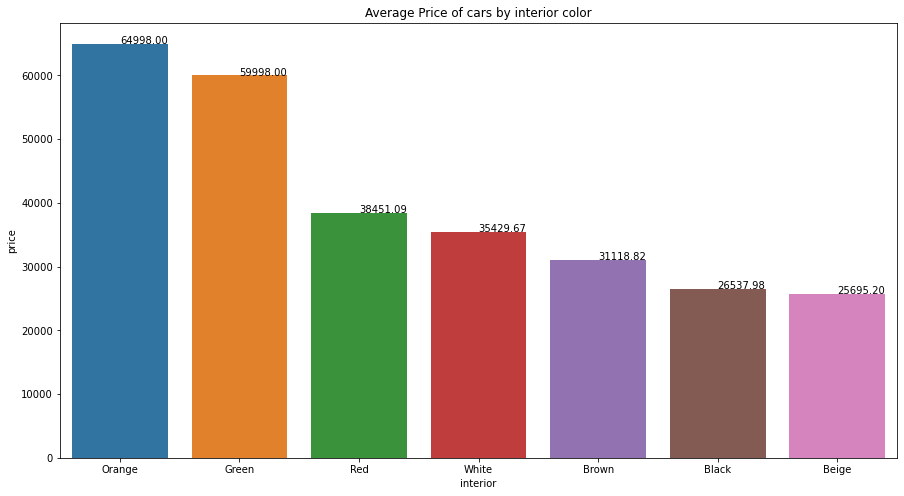

In [37]:
j = df.groupby('interior')['price'].mean().sort_values(ascending= False).head(7).reset_index()

sns.barplot(data= j, x= j['interior'], y= j['price'])
plt.title('Average Price of cars by interior color')

for j,data in enumerate(j['price']):
    plt.text(j,data, s= f'{data:.2f}')

In [ ]:
# From the above plot we can conclude that the car having interior color orange has the most average price

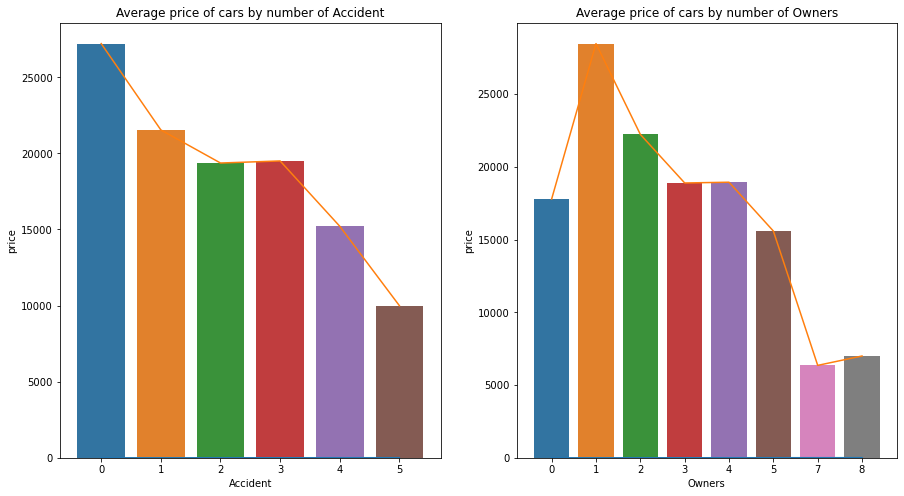

In [38]:
k = ['Accident', 'Owners']

for i, col in enumerate(k):
    plt.subplot(1,2, i+1)
    k = df.groupby(col)['price'].mean().reset_index()
    sns.barplot(data= k, x= k[col], y= k['price'])
    plt.title(f'Average price of cars by number of {col}')
    plt.plot(k)

In [ ]:
# From the above plot we can conclude that the cars having 0 sccident in past has the most average price and cars having 1 owner
# in past has the most average price

## Data Processing

In [39]:
df_encoded = pd.get_dummies(df, columns= ['brand', 'model', 'exterior', 'interior'])
df_encoded.sample()

,miles,price,Accident,Owners,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Buick,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,brand_FIAT,brand_Ford,brand_GMC,brand_Genesis,brand_Honda,brand_Hyundai,brand_INFINITI,brand_Jaguar,brand_Jeep,brand_Karma,brand_Kia,brand_Land,brand_Lexus,brand_Lincoln,brand_MINI,brand_Maserati,brand_Mazda,brand_McLaren,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Pontiac,brand_Porsche,brand_Ram,brand_Rolls-Royce,brand_Saturn,brand_Scion,brand_Subaru,brand_Toyota,brand_Volkswagen,brand_Volvo,model_124 Spider,model_1500,model_1500 Classic,model_2 Series,model_200,model_2500,model_3 Series,model_300,model_4 Series,model_4Runner,model_5 Series,model_500,model_6 Series,model_7 Series,model_718 Cayman,model_720S,model_911,model_A-Class,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_ATS-V,model_Acadia,model_Accent,model_Accord,model_Altima,model_Armada,model_Ascent,model_Atlas,model_Atlas Cross Sport,model_Aura,model_Avalon,model_B9 Tribeca,model_BRZ,model_Beetle,model_Blazer,model_Boxster,model_Bronco,model_Bronco Sport,model_C-Class,model_C-HR,model_CC,model_CL,model_CLA,model_CLK,model_CLS,model_CR-V,model_CR-Z,model_CT,model_CT4,model_CTS,model_CX-3,model_CX-30,model_CX-5,model_CX-9,model_CX-90,model_Camaro,model_Camry,model_Canyon,model_Cascada,model_Cayenne,model_Cayman,model_Challenger,model_Charger,model_Cherokee,model_Civic,model_Clubman,model_Colorado,model_Compass,model_Corolla,model_Corolla Cross,model_Corolla Hatchback,model_Corvette,model_Countryman,model_Crosstour,model_Crosstrek,model_Cruze,model_Cruze Limited,model_Dawn,model_Durango,model_E-Class,model_E-PACE,model_ES,model_EcoSport,model_Econoline Cargo Van,model_Edge,model_Elantra,model_Enclave,model_Encore,model_Encore GX,model_Equinox,model_Escalade,model_Escape,model_Expedition,model_Explorer,model_Explorer Sport Trac,model_Express Cargo Van,model_F-150,model_F-PACE,model_FR-S,model_Fiesta,model_Fit,model_Flying Spur,model_Focus,model_Forester,model_Forte,model_Frontier,model_Fusion,model_G-Class,model_G70,model_G80,model_GL,model_GLA,model_GLB,model_GLC,model_GLE,model_GLK,model_GLS,model_GR Corolla,model_GR Supra,model_GX,model_Genesis,model_Ghibli,model_Gladiator,model_Golf,model_Golf Alltrack,model_Golf GTI,model_GranTurismo,model_Grand Caravan,model_Grand Cherokee,model_Grand Cherokee WK,model_HR-V,model_Hardtop,model_Highlander,model_ILX,model_IS,model_Impala,model_Impala Limited,model_Impreza,model_Integra,model_Jetta,model_Journey,model_K5,model_Kicks,model_Kona,model_LS,model_LX,model_Legacy,model_Levante,model_M-Class,model_M5,model_M6,model_MDX,model_MKC,model_MKX,model_Macan,model_Malibu,model_Martin DB9,model_Martin Vantage,model_Maxima,model_Mazda3,model_Mazda6,model_Metris Cargo Van,model_Mirai,model_Monte Carlo,model_Murano,model_Mustang,model_NEXO,model_NV200 Compact Cargo,model_NX,model_Nautilus,model_Odyssey,model_Optima,model_Outback,model_Outlander,model_Outlander Sport,model_Pacifica,model_Palisade,model_Passat,model_Passport,model_Pathfinder,model_Patriot,model_Pilot,model_Prius,model_Prius Prime,model_Prius c,model_Prius v,model_ProMaster Cargo Van,model_ProMaster City Cargo Van,model_Q3,model_Q5,model_Q50,model_Q60,model_Q7,model_Q70,model_Q8,model_QX50,model_QX55,model_QX60,model_Quattroporte,model_Quest,model_R-Class,model_R8,model_RAV4,model_RAV4 Prime,model_RC,model_RDX,model_RS 5,model_RS 6 Avant,model_RX,model_Ram 1500,model_Ranger,model_Revero GT,model_Rio,model_Rogue,model_Rogue Sport,model_Romeo Giulia,model_Romeo Stelvio,model_Routan,model_Rover Defender,model_Rover Discovery,model_Rover Discovery Sport,model_Rover LR4,model_Rover Range Rover,model_Rover Range Rover Evoque,model_Rover Range Rover Sport,model_Rover Range Rover Velar,model_S-Class,model_S2000,model_S3,model_S60,model_S7,model_S80,model_S90,model_SL,model_SLC,model_SLK,model_Santa Fe,model_Santa Fe Sport,model_Sedona,model_Seltos,model_Sentra,model_Sienna,model_Sierra 15

In [40]:
X = df_encoded.drop('price', axis= 1)
y = df_encoded['price']

In [41]:
from sklearn.model_selection import train_test_split
xc = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(xc,y, test_size= 0.2, random_state= 10)

print(X_train.shape)

(1849, 380)


## Model Building

In [42]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    
    mse_train = mean_squared_error(y_train, train_pred)
    
    rmse_train = round(np.sqrt(mse_train), 4)
    
    return(rmse_train)

In [43]:
def get_test_rmse(model):
    test_pred = model.predict(X_test)
    
    mse_test = mean_squared_error(y_test, test_pred)
    
    rmse_test= round(np.sqrt(mse_test), 4)
    
    return(rmse_test)

In [50]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual-predicted)/actual))*100)

def get_test_mape(model):
    test_pred = model.predict(X_test)
    
    mape_test = mape(y_test, test_pred)
    
    return(mape_test)

In [51]:
def get_score(model):
    
    r_sq = model.score(X_train, y_train)
    
    n = X_train.shape[0]
    
    k = X_train.shape[1]
    
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    return ([r_sq, r_sq_adj])

In [52]:
score_card = pd.DataFrame(columns= ['Model_Name', 'Alpha', 'l1_ratio', 'R_Squared', 'Adj. R_Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha= '-', l1_ratio= '-'):
    global score_card
    
    score_card = score_card.append({'Model_Name': algorithm_name,
                                    'Alpha': alpha,
                                    'l1_ratio': l1_ratio,
                                    'Test_MAPE': get_test_mape(model),
                                    'Test_RMSE': get_test_rmse(model),
                                    'R_Squared': get_score(model)[0],
                                    'Adj. R_Squared': get_score(model)[1]}, ignore_index= True)

### 1. Linear Regression

In [53]:
linreg = LinearRegression()

ML_Model = linreg.fit(X_train, y_train)

ML_Model.score(X_train, y_train)

0.85468013706991

In [54]:
print('RMSE on train set: ', get_train_rmse(ML_Model))

print('RMSE on test set: ', get_test_rmse(ML_Model))

difference = abs(get_test_rmse(ML_Model) - get_train_rmse(ML_Model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  5030.7352
RMSE on test set:  32779236926.269
Difference between RMSE on train and test set:  32779231895.533802


In [55]:
update_score_card(algorithm_name = 'Linear Regression', model = ML_Model)

score_card

,Model_Name,Alpha,l1_ratio,R_Squared,Adj. R_Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.854680,0.817063,32779236926.269001,29184310.931284


### 2. Ride Regression

In [56]:
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 11725.9556


In [57]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

score_card

,Model_Name,Alpha,l1_ratio,R_Squared,Adj. R_Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.854680,0.817063,32779236926.269001,29184310.931284
1,Ridge Regression (with alpha = 1),1,-,0.815730,0.768031,11725.955600,20.417053


### 3. Lasso Regression

In [58]:
lasso = Lasso(alpha = 0.01, max_iter = 500)

lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 11707.9297


In [59]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

score_card

,Model_Name,Alpha,l1_ratio,R_Squared,Adj. R_Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.854680,0.817063,32779236926.269001,29184310.931284
1,Ridge Regression (with alpha = 1),1,-,0.815730,0.768031,11725.955600,20.417053
2,Lasso Regression,0.01,-,0.854680,0.817063,11707.929700,19.983920


### 4. Ridge Regression (Using GridSearch)

In [60]:
tuned_parameters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]

ridge = Ridge()

ridge_grid = GridSearchCV(estimator= ridge,
                          param_grid= tuned_parameters,
                          cv= 10)

ridge_grid.fit(X_train, y_train)

print('Best Parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

print('RMSE on test set: ', get_test_rmse(ridge_grid))

Best Parameters for Ridge Regression:  {'alpha': 1} 

RMSE on test set:  11725.9556


In [61]:
update_score_card(algorithm_name = 'Ridge Regression (Using Grid)', model = ridge_grid, alpha = '0.01')

score_card

,Model_Name,Alpha,l1_ratio,R_Squared,Adj. R_Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.854680,0.817063,32779236926.269001,29184310.931284
1,Ridge Regression (with alpha = 1),1,-,0.815730,0.768031,11725.955600,20.417053
2,Lasso Regression,0.01,-,0.854680,0.817063,11707.929700,19.983920
3,Ridge Regression (Using Grid),0.01,-,0.815730,0.768031,11725.955600,20.417053


### 5. Lasso Regression (Using GridSearch)

In [62]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
lasso = Lasso()


lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

lasso_grid.fit(X_train, y_train)

print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1} 

RMSE on test set: 11805.5445


In [63]:
update_score_card(algorithm_name = 'Lasso Regression(Using Grid)', model = lasso_grid, alpha = '0.01')

score_card

,Model_Name,Alpha,l1_ratio,R_Squared,Adj. R_Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.854680,0.817063,32779236926.269001,29184310.931284
1,Ridge Regression (with alpha = 1),1,-,0.815730,0.768031,11725.955600,20.417053
2,Lasso Regression,0.01,-,0.854680,0.817063,11707.929700,19.983920
3,Ridge Regression (Using Grid),0.01,-,0.815730,0.768031,11725.955600,20.417053
4,Lasso Regression(Using Grid),0.01,-,0.853295,0.815320,11805.544500,19.748533


### 6. Elastic Net

In [64]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

enet.fit(X_train, y_train)



print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 13753.4169


In [65]:
update_score_card(algorithm_name = 'Elastic Net', model = enet, alpha = '0.01')

score_card

,Model_Name,Alpha,l1_ratio,R_Squared,Adj. R_Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.854680,0.817063,32779236926.269001,29184310.931284
1,Ridge Regression (with alpha = 1),1,-,0.815730,0.768031,11725.955600,20.417053
2,Lasso Regression,0.01,-,0.854680,0.817063,11707.929700,19.983920
3,Ridge Regression (Using Grid),0.01,-,0.815730,0.768031,11725.955600,20.417053
4,Lasso Regression(Using Grid),0.01,-,0.853295,0.815320,11805.544500,19.748533
5,Elastic Net,0.01,-,0.393621,0.236657,13753.416900,27.335647


### 7. Elastic Net (Using GridSearch)

In [66]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

enet = ElasticNet()


enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train, y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.0001} 

RMSE on test set: 11566.3228


In [67]:
update_score_card(algorithm_name = 'Elastic Net (Using Grid)', model = enet_grid, alpha = '0.01')

score_card

,Model_Name,Alpha,l1_ratio,R_Squared,Adj. R_Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.854680,0.817063,32779236926.269001,29184310.931284
1,Ridge Regression (with alpha = 1),1,-,0.815730,0.768031,11725.955600,20.417053
2,Lasso Regression,0.01,-,0.854680,0.817063,11707.929700,19.983920
3,Ridge Regression (Using Grid),0.01,-,0.815730,0.768031,11725.955600,20.417053
4,Lasso Regression(Using Grid),0.01,-,0.853295,0.815320,11805.544500,19.748533
5,Elastic Net,0.01,-,0.393621,0.236657,13753.416900,27.335647
6,Elastic Net (Using Grid),0.01,-,0.851751,0.813376,11566.322800,20.064891


## Comparing the Model Performance

In [68]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha,l1_ratio,R_Squared,Adj. R_Squared,Test_RMSE,Test_MAPE
0,Elastic Net (Using Grid),0.01,-,0.851751,0.813376,11566.322800,20.064891
1,Lasso Regression,0.01,-,0.854680,0.817063,11707.929700,19.983920
2,Ridge Regression (with alpha = 1),1,-,0.815730,0.768031,11725.955600,20.417053
3,Ridge Regression (Using Grid),0.01,-,0.815730,0.768031,11725.955600,20.417053
4,Lasso Regression(Using Grid),0.01,-,0.853295,0.815320,11805.544500,19.748533
5,Elastic Net,0.01,-,0.393621,0.236657,13753.416900,27.335647
6,Linear Regression,-,-,0.854680,0.817063,32779236926.269001,29184310.931284


In [ ]:
# After comparing models with their RMSE score from the above frame we can see that Elastic Net (Using GridSearch) has the
# lowest RMSE score compare to other model